In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')




In [5]:
# Display All Columns
pd.set_option('display.max_columns', None)

 **Load** **dataset**

In [6]:
# Load dataset
data = pd.read_csv('train_product_data.csv')
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,abda697c6da997f66c78d91d6c88078c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air,Mobiles & Accessories,ACCE9ZY9K4BHVYNA,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14995,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
14996,b4fad612a9f72f1ffd10134f9be7cfe8,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air 2,Mobiles & Accessories,ACCE9Z2HKHDGH7JY,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air 2 (...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14997,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


Display the top 10 rows of the dataframe

In [7]:
# Display first few rows
data.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
5,4044c0ac52c1ee4b28777417651faf42,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVUHAAVH9X,1199.0,479.0,"[""http://img5a.flixcart.com/image/short/5/z/c/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
6,e54bc0a7c3429da2ebef0b30331fe3d2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/ladela-bellies/p/itmeh...,Ladela Bellies,Footwear,SHOEH4KM2W3Z6EH5,1724.0,950.0,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",..."
7,c73e78fb440ff8972e0762daed4fc109,2016-03-25 22:59:23 +0000,http://www.flipkart.com/carrel-printed-women-s...,Carrel Printed Women's,Clothing,SWIEHF3EF5PZAZUY,2299.0,910.0,"[""http://img6a.flixcart.com/image/swimsuit/5/v...",False,Key Features of Carrel Printed Women's Fabric:...,No rating available,No rating available,Carrel,"{""product_specification""=>[{""key""=>""Neck"", ""va..."
8,9aacdecceb404c74abddc513fd2756a8,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FGBDJGX8FW,999.0,379.0,"[""http://img6a.flixcart.com/image/short/q/z/v/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
9,83c53f8948f508f51d2249b489ca8e7d,2016-03-25 22:59:23 +0000,http://www.flipkart.com/freelance-vacuum-bottl...,Freelance Vacuum Bottles 350 ml Bottle,Pens & Stationery,BOTEGYTZ2T6WUJMM,699.0,699.0,"[""http://img5a.flixcart.com/image/bottle/j/m/m...",False,Specifications of Fr

**3. Exploratory Data Analysis (EDA)**

In [8]:
data['product_category_tree'].value_counts()

,count
product_category_tree,
Clothing,5316
Jewellery,3218
Footwear,1083
Automotive,937
Mobiles & Accessories,768
Home Decor & Festive Needs,714
Kitchen & Dining,610
Computers,531
Watches,526


In [9]:
# Display dataset shape
data.shape


(14999, 15)

In [10]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

**Summary Statistics**

In [11]:
# Display summary statistics
data.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


**4. Visualization**

Plot the count of each category

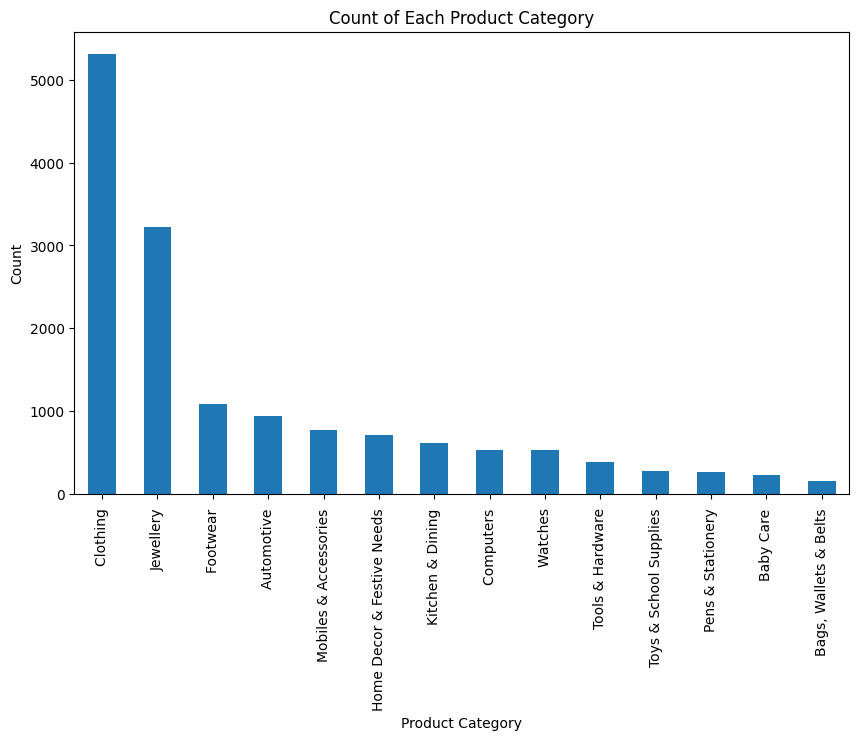

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data['product_category_tree'].value_counts().plot(kind='bar')
plt.title('Count of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


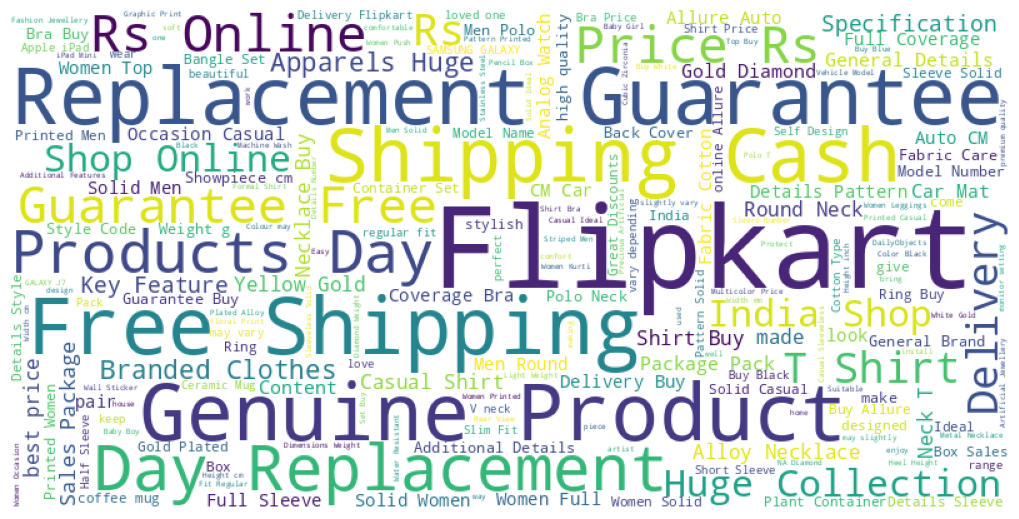

In [13]:
from wordcloud import WordCloud, STOPWORDS

# Combine all product categories into a single string
text = " ".join(str(category) for category in data['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Bar Chart**

Creating bar charts to visualize the frequency of specific words or phrases is a great way to gain insights from text data.

Let us generate a bar chart showing the frequency of specific words in Description column

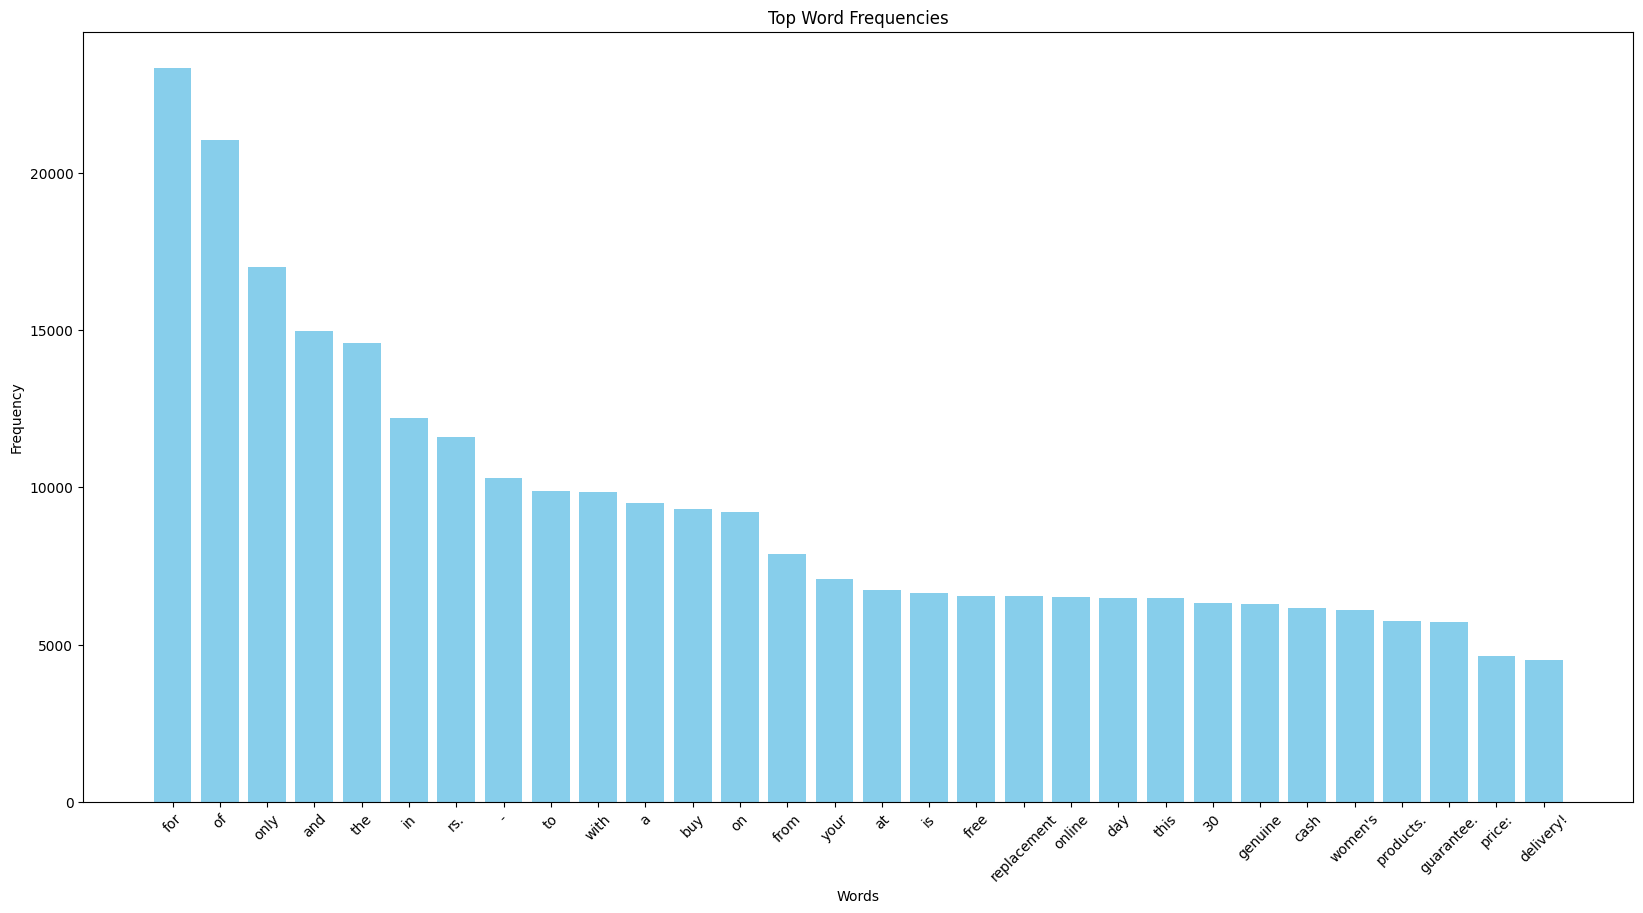

In [14]:
from collections import Counter

text = " ".join(str(category) for category in data['description'])

# Clean and split the text into words
words = text.lower().split()  # Convert to lowercase and split into words

# Count word frequencies
word_counts = Counter(words)

# Convert to DataFrame for easier plotting
bar_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
bar_df = bar_df.sort_values(by='Frequency', ascending=False)

# Select the top N words to display
top_n = 30
top_words = bar_df.head(top_n)

# Create a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Word Frequencies')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

**Histogram**

Visualizing the distribution of text lengths using histograms is a great way to understand the variability in your text data.

Let us generate a histogram of text lengths.

                                uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3      ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4      29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
14994  abda697c6da997f66c78d91d6c88078c  2015-12-20 08:26:17 +0000   
14995  87bcdd46bb48bfc1045d7ee84aef7b7a  2015-12-20 08:26:17 +0000   
14996  b4fad612a9f72f1ffd10134f9be7cfe8  2015-12-20 08:26:17 +0000   
14997  1336909e5468b63c9b1281350eba647d  2015-12-20 08:26:17 +0000   
14998  d6eff0e0c938cc39c4451083994a2227  2015-12-20 08:26:17 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http://www.flipkart.com/aw-belli

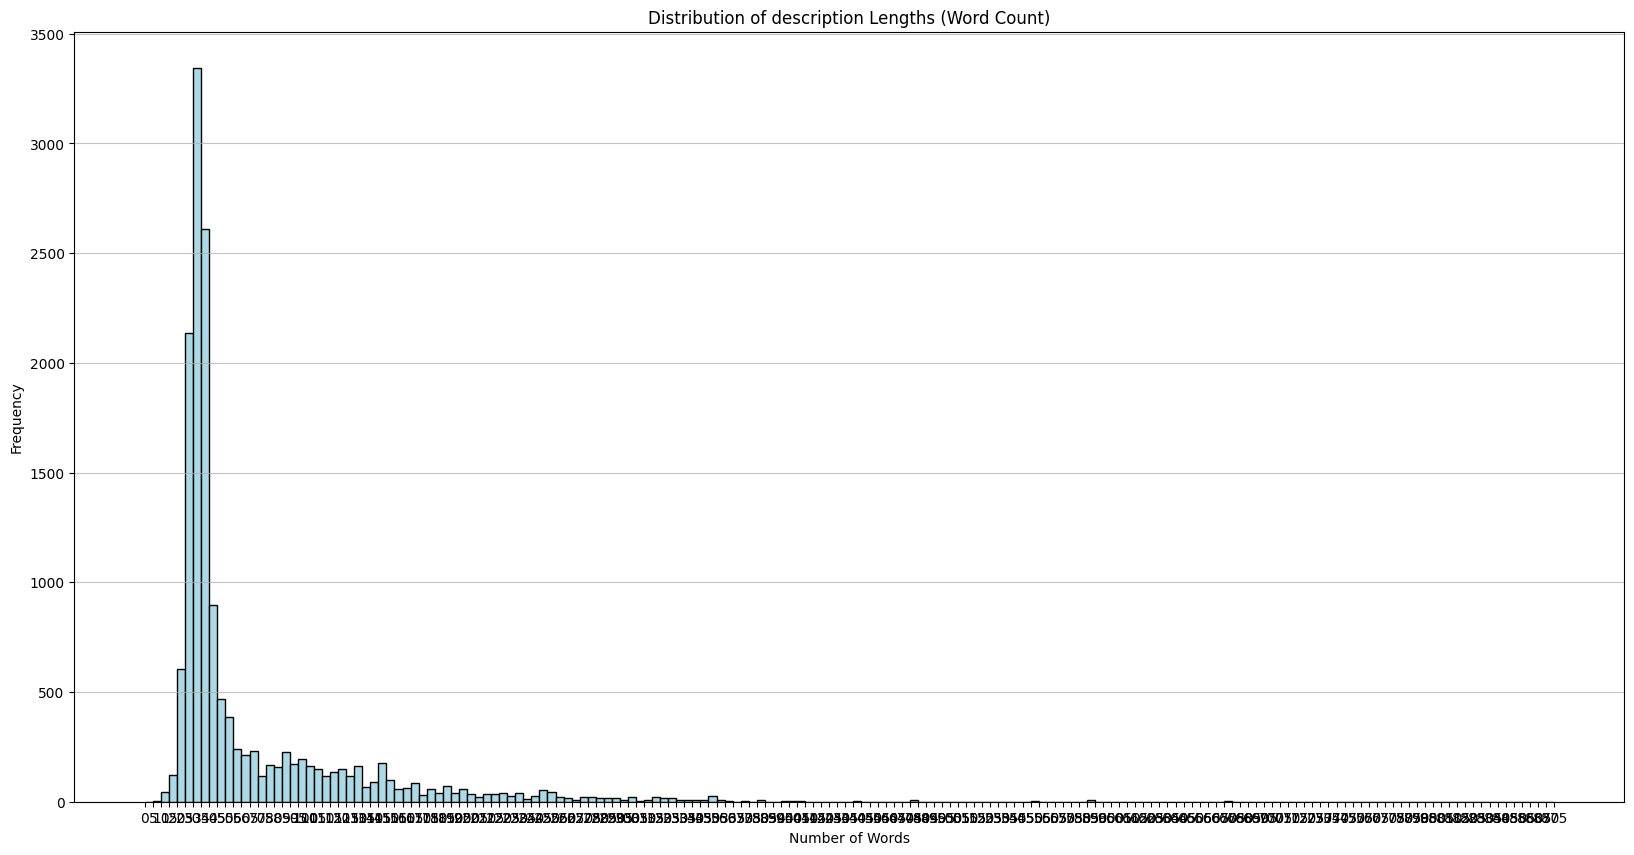

In [15]:
# Histogram

# Calculate the length of each description (word count)
data['word_count'] = data['description'].apply(lambda x: len(str(x).split()) if not isinstance(x, float) else 0)

# Display the DataFrame with word counts
print(data)

# Create a histogram
plt.figure(figsize=(20, 10))
plt.hist(data['word_count'], bins=range(0, max(data['word_count']) + 5, 5), color='lightblue', edgecolor='black')
plt.title('Distribution of description Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(range(0, max(data['word_count']) + 5, 5))  # Set x-ticks for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

**Correlation Matrix**

A correlation matrix is a table showing the correlation coefficients of many variables, most of them in one common data set. Each cell of the matrix expresses the correlation between any pair of variables, which can be valuable in determining relationships between them.

Key Points about Correlation:

A correlation coefficient- is a numerical measure of the strength and direction of a linear relationship between two variables, usually from -1 to +1.

1: Perfect positive correlation (as one variable increases, the other one increases).
0: Nothing; no correlation (the variables are independent in linearity).
-1: Perfect negative correlation (as one variable increases, the other decreases).
A heatmap - highly effective way of presenting the correlation matrix and making basic relationships between the variables quickly assessed without going into tedious readings of numerical terms.

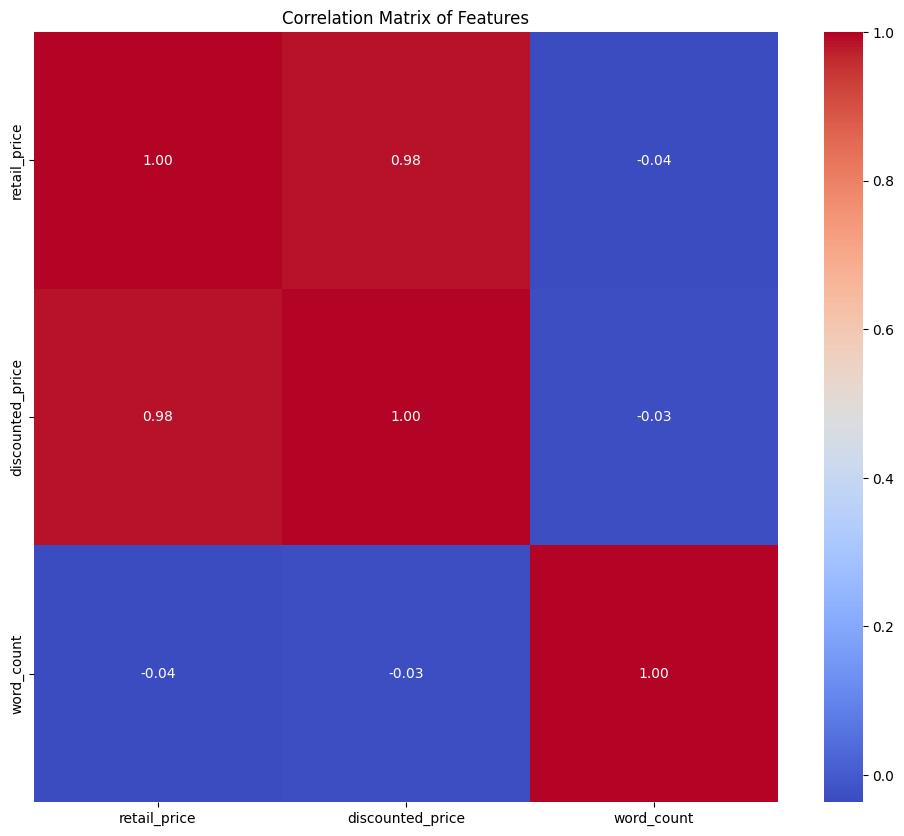

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, only including numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr( numeric_only = True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Data cleaning**

In [17]:
#list of all the columns in the dataset
print(data.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications', 'word_count']


In [18]:
#dropping the columns which do not add much meaning to our problem statement
df = data.drop(['uniq_id',
               'crawl_timestamp',
               'product_url',
               'pid',
               'retail_price',
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

In [19]:
df.head()

,product_name,product_category_tree,description,brand,word_count
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,64
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,107
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,63
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,65
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,64


**Check for duplicate rows and drop them**

In [20]:
# Checking any duplicated rows
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

1771


In [21]:
# drop duplicate values if any
df = df.drop_duplicates()

In [22]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


**Checking any Missing values**

In [23]:
df.isnull().sum()

,0
product_name,0
product_category_tree,0
description,1
brand,4162
word_count,0


In [24]:
null_value_percentage = df.isnull().sum()/df.shape[0]
print(null_value_percentage)

product_name             0.000000
product_category_tree    0.000000
description              0.000076
brand                    0.314636
word_count               0.000000
dtype: float64


**Handling missing values**

Missing values in dataset can lead to disbalanced data and will not show accurate predictions.

Let us check for any missing value in the data and handle them.

In [25]:
# Fill missing values in 'brand' with 'Unknown'
df['brand'] = df['brand'].fillna('Unknown')

# Fill missing values in 'description' with 'No description'
df['description'] = df['description'].fillna('No description')

# Verify if there are any more missing values
print(df.isnull().sum())

product_name             0
product_category_tree    0
description              0
brand                    0
word_count               0
dtype: int64


**6. Feature Engineering**

a) TF - IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection.

In [26]:
# Fill missing values
df['description'].fillna('', inplace=True)
df['product_name'].fillna('', inplace=True)
df.isnull().sum()

,0
product_name,0
product_category_tree,0
description,0
brand,0
word_count,0


In [27]:
import re

def clean_text(text):
    """
    Cleans the input text by removing special characters, extra whitespace,
    converting to lowercase, and handling missing values.
    """
    if not isinstance(text, str):  # Handle missing values or non-string types
        return ""

    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = text.lower() # Convert to lowercase
    return text


# Apply the cleaning function to the 'description' column
df['cleaned_description'] = df['description'].apply(clean_text)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'description' is the column with text data
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['cleaned_description'])

# Now tfidf_matrix contains the TF-IDF features for your text data
# You can access the feature names using tfidf.get_feature_names_out()

#  Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)

# Convert the matrix to a DataFrame (optional, for easier viewing)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
#print(tfidf_df.head())

(13228, 24097)


In [29]:
# Tokenization
tokenized_descriptions = [desc.split() for desc in df['cleaned_description']]

**b) Word Embedding**

Word embedding is a technique used in Natural Language Processing (NLP) where words or phrases from a vocabulary are represented as dense, real-valued vectors in a continuous vector space. This allows for capturing semantic relationships between words based on their proximity in the vector space.

In [30]:
import nltk
# Download the required NLTK data package
nltk.download('punkt_tab')

# Now you can continue with your code
from nltk.tokenize import word_tokenize

# Example using Word2Vec (you'll need to install gensim)
!pip install gensim

from gensim.models import Word2Vec

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average word embedding for a description
def get_embedding(description):
  embeddings = []
  for word in word_tokenize(description):
    try:
      embeddings.append(model.wv[word])
    except KeyError:
      # Handle words not in vocabulary (e.g., assign a zero vector or skip)
      continue
  if embeddings:
    return np.mean(embeddings, axis=0)
  else:
    return np.zeros(100)  # Return a zero vector for empty descriptions

# Apply the embedding function to the cleaned descriptions
w2v_embeddings = df['cleaned_description'].apply(get_embedding)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [31]:
# Reshape w2v_embeddings to a 2D array
w2v_embeddings_2d = np.vstack(w2v_embeddings)

# Combine TF-IDF and Word2Vec features
combined_features = np.hstack((tfidf_df.values, w2v_embeddings_2d))

In [32]:
combined_df = pd.DataFrame(combined_features)

**One-hot encoding**

 is a method for converting categorical variables into a format that can be provided to machine learning algorithms to improve predictions. It transforms each category into a new binary column (0s and 1s), indicating the presence or absence of each category in the original data

In [33]:
# One - Hot encoding

y = pd.get_dummies(df['product_category_tree']).values

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = df['product_category_tree']
encoder.fit(y)
y = encoder.transform(y)

**Train Test Split**

Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [35]:
from sklearn.model_selection import train_test_split

# Split features and target
X = combined_features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10582, 24197)
X_test shape: (2646, 24197)
y_train shape: (10582,)
y_test shape: (2646,)


**Feature Scaling**

In [36]:
# To scale the features using StandardScaler
def scale_features(X_train, X_test):
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data with the fitted scaler
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, multilabel_confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# Define the evaluation function that accepts model_name
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model", tuned_model=None):
    # Train the model
    model.fit(X_train, y_train)

    # Make the prediction on train set
    y_train_pred = model.predict(X_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the on test data set model
    accuracy = accuracy_score(y_train, y_train_pred)
    print(f'{model_name} - Train Accuracy: {accuracy}')
    precision = precision_score(y_train, y_train_pred, average='weighted')  # Use 'micro', 'macro', or 'weighted' for multi-class
    recall = recall_score(y_train, y_train_pred, average='weighted')  # Use 'micro', 'macro', or 'weighted' for multi-class
    print(f"{model_name} -Train Precision: {precision}")
    print(f"{model_name} - Train Recall: {recall}")

    # Evaluate the on test data set model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} - Test Accuracy: {accuracy}')
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'micro', 'macro', or 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'micro', 'macro', or 'weighted' for multi-class
    print(f"{model_name} - Test Precision: {precision}")
    print(f"{model_name} -Test Recall: {recall}")
    print(f"\n{model_name} - Test Classification Report:\n", classification_report(y_test, y_pred))








In [38]:
!pip install xgboost


In [ ]:
# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

# Model 1: Logistic Regression
model_1 = LogisticRegression(random_state=42, max_iter=1000)
evaluate_model(model_1, X_train, y_train, X_test, y_test, model_name="Logistic regression")

# Model 2: XgBoost
model_2 = xgb.XGBClassifier()
evaluate_model(model_2, X_train, y_train, X_test, y_test, model_name="XgBoost")

# Model 3: Random Forest Classifier
model_3 = RandomForestClassifier(random_state=42)
evaluate_model(model_3, X_train, y_train, X_test, y_test, model_name="Random Forest")







Logistic regression - Train Accuracy: 0.9847854847854848
Logistic regression -Train Precision: 0.984938279580293
Logistic regression - Train Recall: 0.9847854847854848
Logistic regression - Test Accuracy: 0.9690098261526833
Logistic regression - Test Precision: 0.9694260729778141
Logistic regression -Test Recall: 0.9690098261526833

Logistic regression - Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       197
           1       0.92      0.71      0.80        34
           2       0.97      0.83      0.89        35
           3       0.99      1.00      0.99       931
           4       0.90      0.94      0.92       106
           5       0.99      0.98      0.98       202
           6       0.93      0.97      0.95       114
           7       0.99      0.99      0.99       529
           8       0.92      0.97      0.94       131
           9       0.93      0.94      0.93       110
          10       

In [ ]:
Model 4 : Extra Tree Classifier
model_4= ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=3, random_state=42)
evaluate_model(model_4, X_train, y_train, X_test, y_test, model_name="Extra Tree Classifier")

**8. Dealing with Imbalanced data**

How SMOTE Works

Identify Minority Class: SMOTE identifies the instances in the minority class.
Choose Neighbors: For each instance in the minority class, it selects a number of its nearest neighbors (typically using Euclidean distance).
Generate Synthetic Samples: New samples are created by interpolating between the instance and its neighbors

In [ ]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

In [ ]:
X,y =X_resampled, y_resampled
df_resampled = pd.concat([X,y], axis =1)
df_resampled.head(5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Logistic Regression
model_1 = LogisticRegression(random_state=42, max_iter=1000)
evaluate_model(model_1, X_train, y_train, X_test, y_test, model_name="Logistic regression")

# Model 2: XgBoost
model_2 = xgb.XGBClassifier()
evaluate_model(model_2, X_train, y_train, X_test, y_test, model_name="XgBoost")

# Model 3: Random Forest Classifier
model_3 = RandomForestClassifier(random_state=42)
evaluate_model(model_3, X_train, y_train, X_test, y_test, model_name="Random Forest")

**Cross - Validation Method**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

**Hyperparameter Tuning**.

To optimize models, use GridSearchCV or RandomizedSearchCV to search over a range of hyperparameters. This helps to find the best combination for models.

**1. Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],               # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")


grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test, tuned_model=grid_search_lr.best_estimator_)

**2. For Random Forest Classifier**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
}

# Perform GridSearchCV with RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Use the best model from GridSearchCV for evaluation
evaluate_model(RandomForestClassifier(), X_train, y_train, X_test, y_test, tuned_model=grid_search_rf.best_estimator_)

**Extra Tree Classifier**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(etc_model, X_resampled_scaled, y_resampled, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


# Set up GridSearchCV
grid_search = GridSearchCV(estimator=etc_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_etc_model = grid_search.best_estimator_
y_pred = best_etc_model.predict(X_test)

model_5= ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=3, random_state=42)
evaluate_model(model_5, X_train, y_train, X_test, y_test, model_name="Extra Tree Classifier")
